## PRCP-1012-GameWinnerPred

### Problem Statement

In the highly competitive world of PlayerUnknown’s Battlegrounds (PUBG), predicting the winner of a match can provide valuable insights for players, teams, and analysts. The goal is to develop a predictive model to estimate the win probability in a PUBG match and identify key factors influencing the outcome.

### 1.Importing Libraries

In [1]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

#Importing LabelEncoder,StandardScaler
from sklearn.preprocessing import*

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import *

# Importing LogisticRegressor model from sklearn
from sklearn.linear_model import LinearRegression

# Importing RandomForestRegressor model from sklearn
from sklearn.ensemble import RandomForestRegressor

# Importing XGBRegressor model from sklearn
from xgboost import XGBRegressor

# Importing LightGBMRegressor
from lightgbm import LGBMRegressor

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

### 2.Importing data

In [2]:
data=pd.read_csv('pubg.csv')
pd.set_option('display.max_columns', None)
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


**Insight:** This dataset contains approximately 4.4 million records and 28 predictor variables, including 27 numerical features and 1 categorical feature, along with a target column.

### 3.Domain Analysis

1. Id – Unique identifier for each player.
2. groupId – Unique identifier for a team or group in a match.
3. matchId – Unique identifier for each match.
4. assists – Number of enemy kills assisted by the player.
5. boosts – Number of healing boost items (energy drinks & painkillers) used.
6. damageDealt – Total damage inflicted on enemies.
7. DBNOs – Number of enemies knocked down but not killed.
8. headshotKills – Number of kills achieved through headshots.
9. heals – Number of healing items used by the player.
10. killPlace – Ranking of the player based on the number of kills.
11. killPoints – Ranking points awarded based on kills.
12. kills – Total number of enemies eliminated by the player.
13. killStreaks – Maximum number of consecutive kills by the player.
14. longestKill – Maximum distance from which the player secured a kill.
15. matchDuration – Total duration of the match in seconds.
16. matchType – Type of match (Solo, Duo, Squad, etc.).
17. maxPlace – Highest possible placement rank in the match.
18. rankPoints – Player’s ranking points based on competitive performance.
19. revives – Number of teammates revived by the player.
20. rideDistance – Distance traveled using vehicles.
21. roadKills – Number of enemies killed by hitting them with a vehicle.
22. swimDistance – Distance traveled by swimming.
23. teamKills – Number of teammates killed by the player.
24. vehicleDestroys – Number of enemy vehicles destroyed.
25. walkDistance – Distance traveled on foot.
26. weaponsAcquired – Number of weapons picked up by the player.
27. winPoints – Points awarded based on match victory performance.
28. winPlacePerc – Target variable representing the player’s final placement percentage in the match.

### 4.Basic Checks

In [3]:
#checking the first five rows of the data
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
#checking the last five rows of the data
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,0,2,1,78.25,1766,solo-fpp,98,94,1590,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [5]:
#checking the number of rows and column in the data
data.shape

(4446966, 29)

In [6]:
#checking the predictors of the data
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [7]:
#checking the unique values
for i in data:
    print(i)
    print(data[i].unique())
    print(f'Number of unique values:{data[i].nunique()}')
    print('  ')

Id
['7f96b2f878858a' 'eef90569b9d03c' '1eaf90ac73de72' ... 'e1948b1295c88a'
 'cc032cdd73b7ac' '0d8e7ed728b6fd']
Number of unique values:4446966
  
groupId
['4d4b580de459be' '684d5656442f9e' '6a4a42c3245a74' ... 'ac3f1b4a56e5ad'
 '408cdb5c46b2ac' '8c74f72fedf5ff']
Number of unique values:2026745
  
matchId
['a10357fd1a4a91' 'aeb375fc57110c' '110163d8bb94ae' ... '21beed46753ed9'
 '224a123c53e008' 'fcad6c3fdd847a']
Number of unique values:47965
  
assists
[ 0  1  3  2  4  6  5  8  9  7 13 11 12 21 10 20 14 17 22 15]
Number of unique values:20
  
boosts
[ 0  1  2  3  4  6  5  9  7  8 11 10 13 14 12 21 15 20 16 17 33 19 18 24
 28 23 22]
Number of unique values:27
  
damageDealt
[ 0.     91.47   68.     ...  6.828   0.8276  0.8705]
Number of unique values:29916
  
DBNOs
[ 0  1  6  4  3  2  5 10  8  7  9 13 21 12 11 19 32 18 24 22 20 14 15 26
 17 16 25 27 23 33 38 30 29 31 39 35 40 28 53]
Number of unique values:39
  
headshotKills
[ 0  1  2  3  6  4  5  8  9  7 17 10 14 12 40 11 13 15 16 18 

In [8]:
#checking the count of unique values
for i in data:
    print(data[i].value_counts())

Id
7f96b2f878858a    1
d19659ceb5b553    1
b587ef96cf8d87    1
66715fcb3b871d    1
59e0d2fdd292a8    1
                 ..
0f3c9b54ce4173    1
9a91d96d201b22    1
a92d0949e8830e    1
f1d8ef55f70584    1
0d8e7ed728b6fd    1
Name: count, Length: 4446966, dtype: int64
groupId
14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: count, Length: 2026745, dtype: int64
matchId
4b5db40aec4797    100
b10e8738adafb9    100
bc28c54250342d    100
c2db47653f79b7    100
79e05d7908e0ca    100
                 ... 
39d2800dad8ae6      6
9f2b49358564ea      6
8aa5066c4b6a79      5
e5a77433bc436f      2
224a123c53e008      1
Name: count, Length: 47965, dtype: int64
assists
0     3667660
1      591883
2      137144
3       35640
4        9990
5        2892
6         976
7         387
8         185
9          84
10         48

In [9]:
#checking a concise summary of a data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [10]:
#To check the descriptive statistics of a data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


### 5.Exploratory Data Analysis

#### 5.1.Univariate Analysis

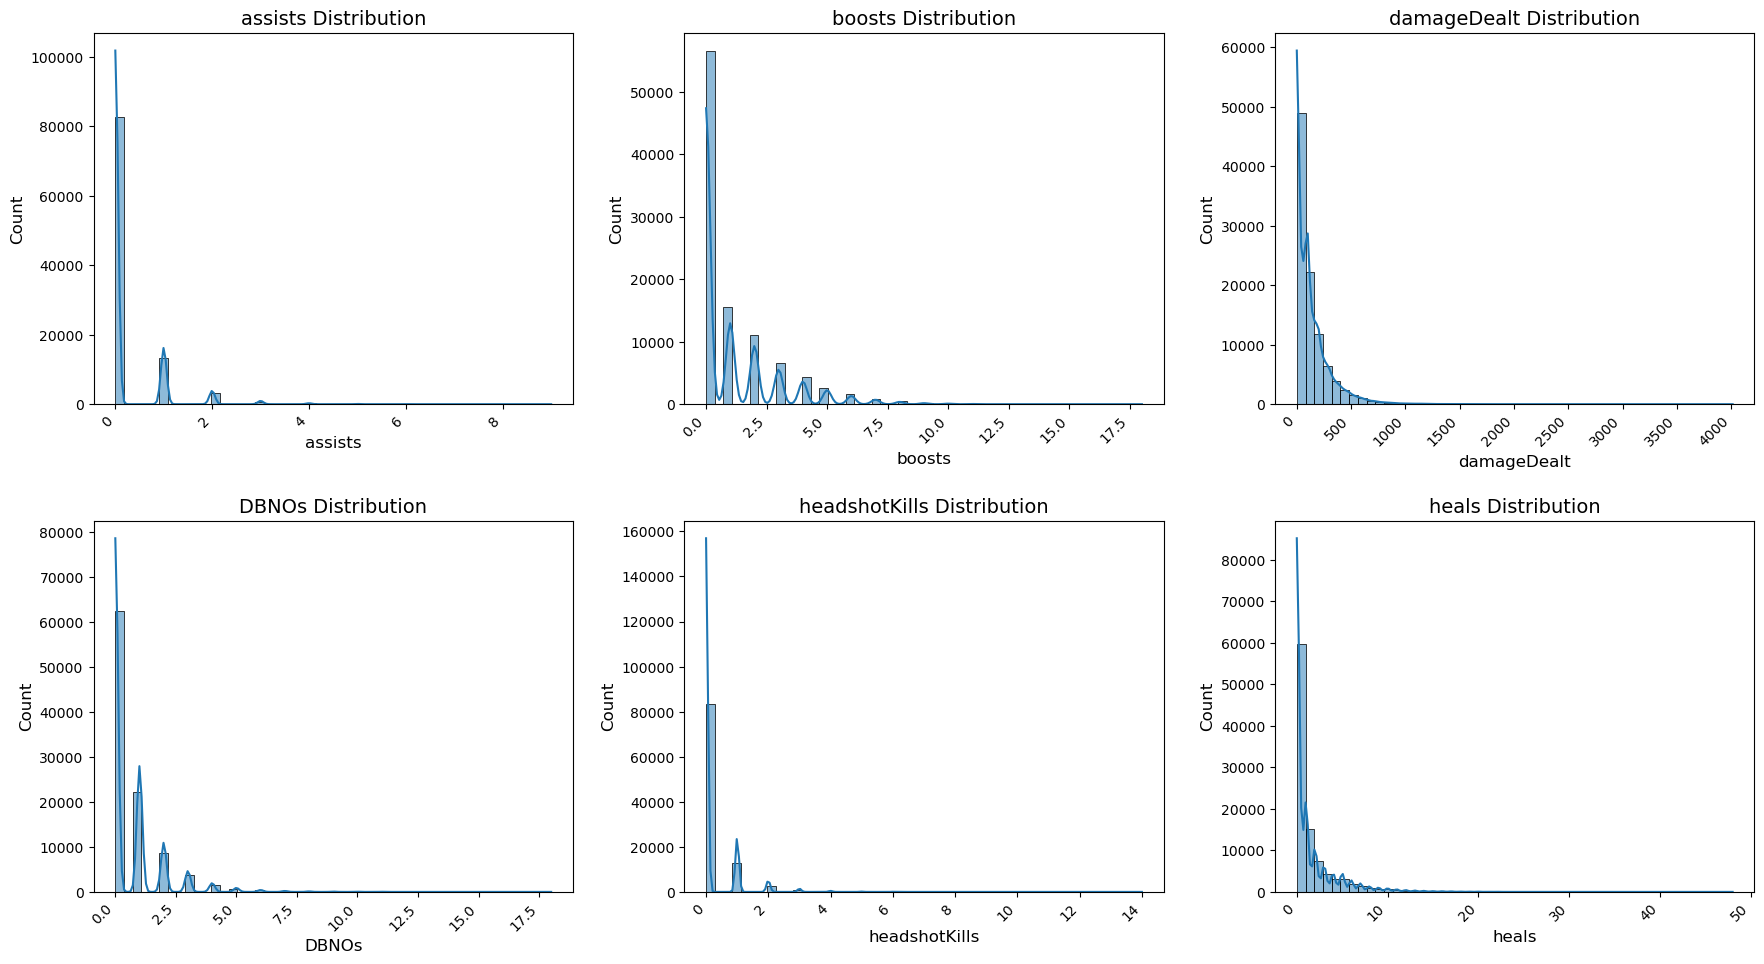

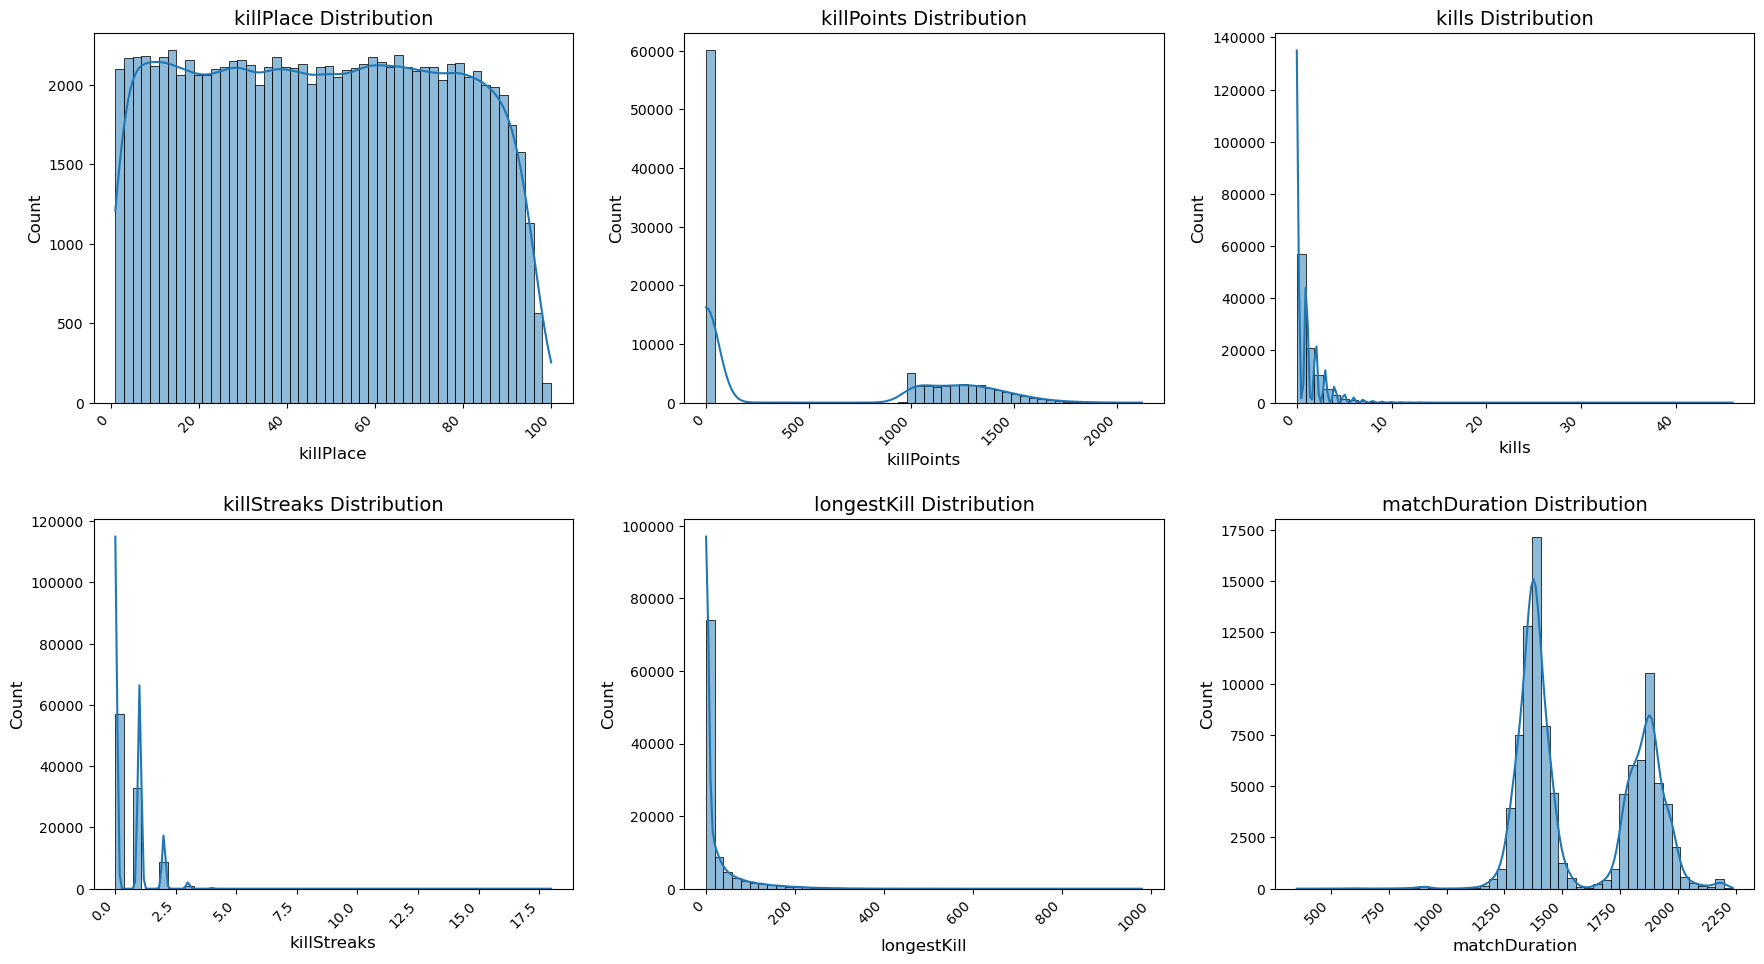

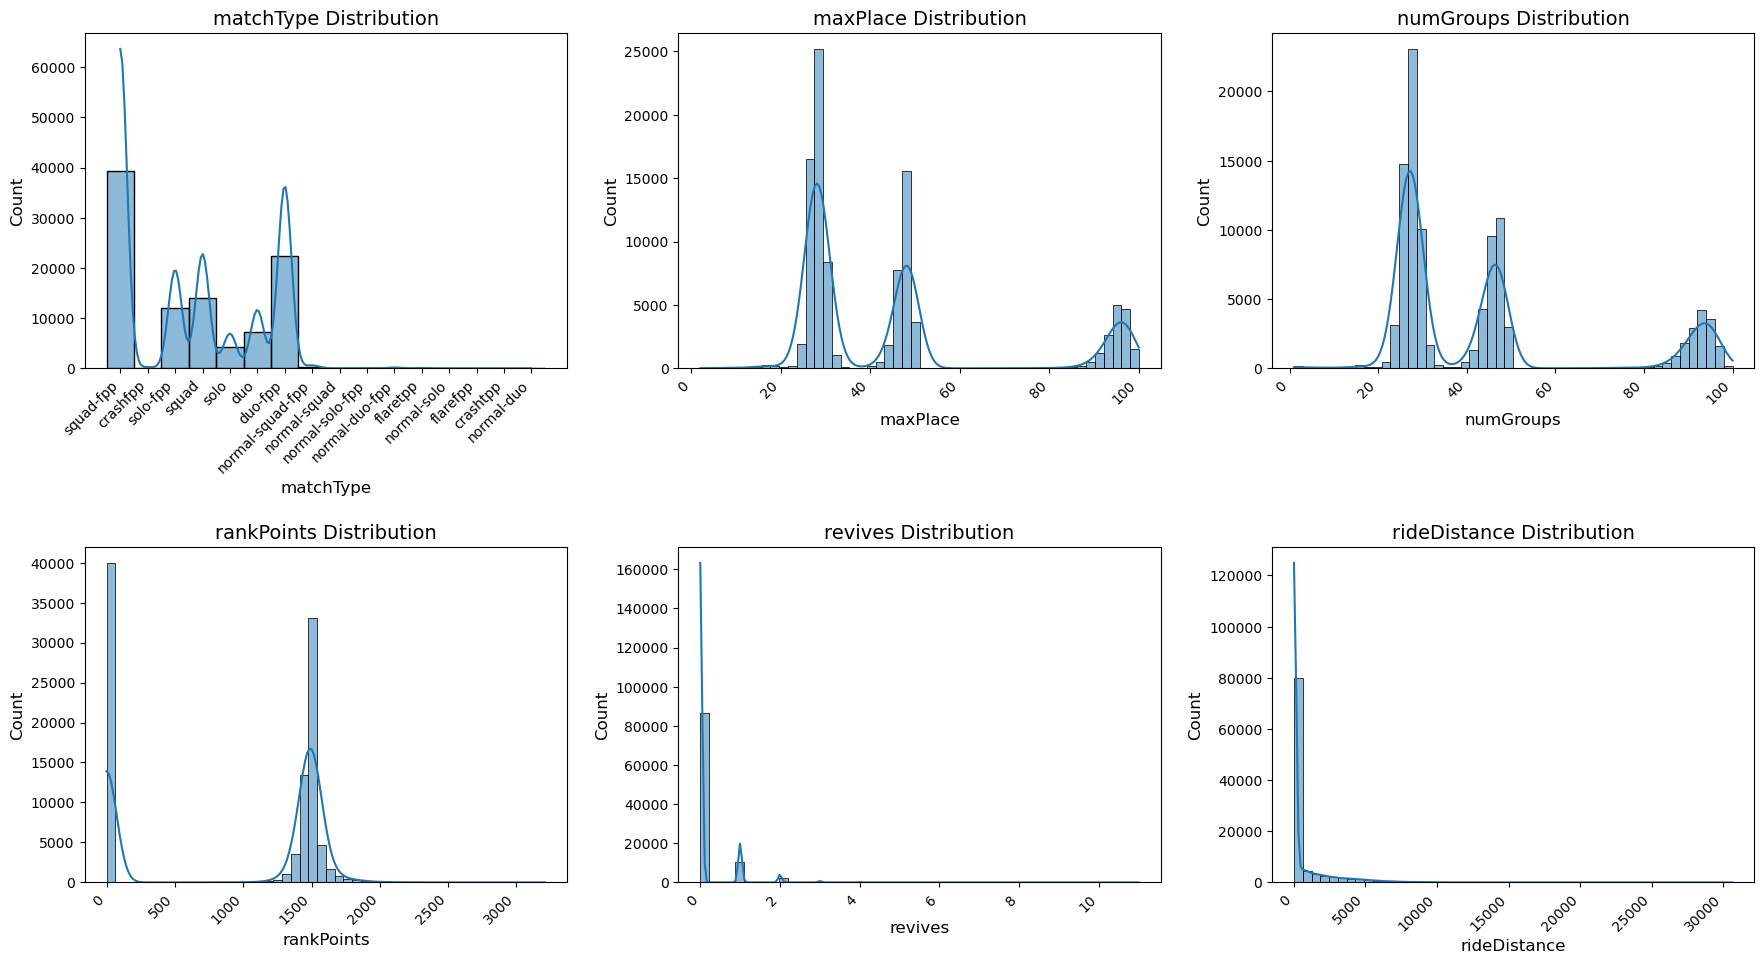

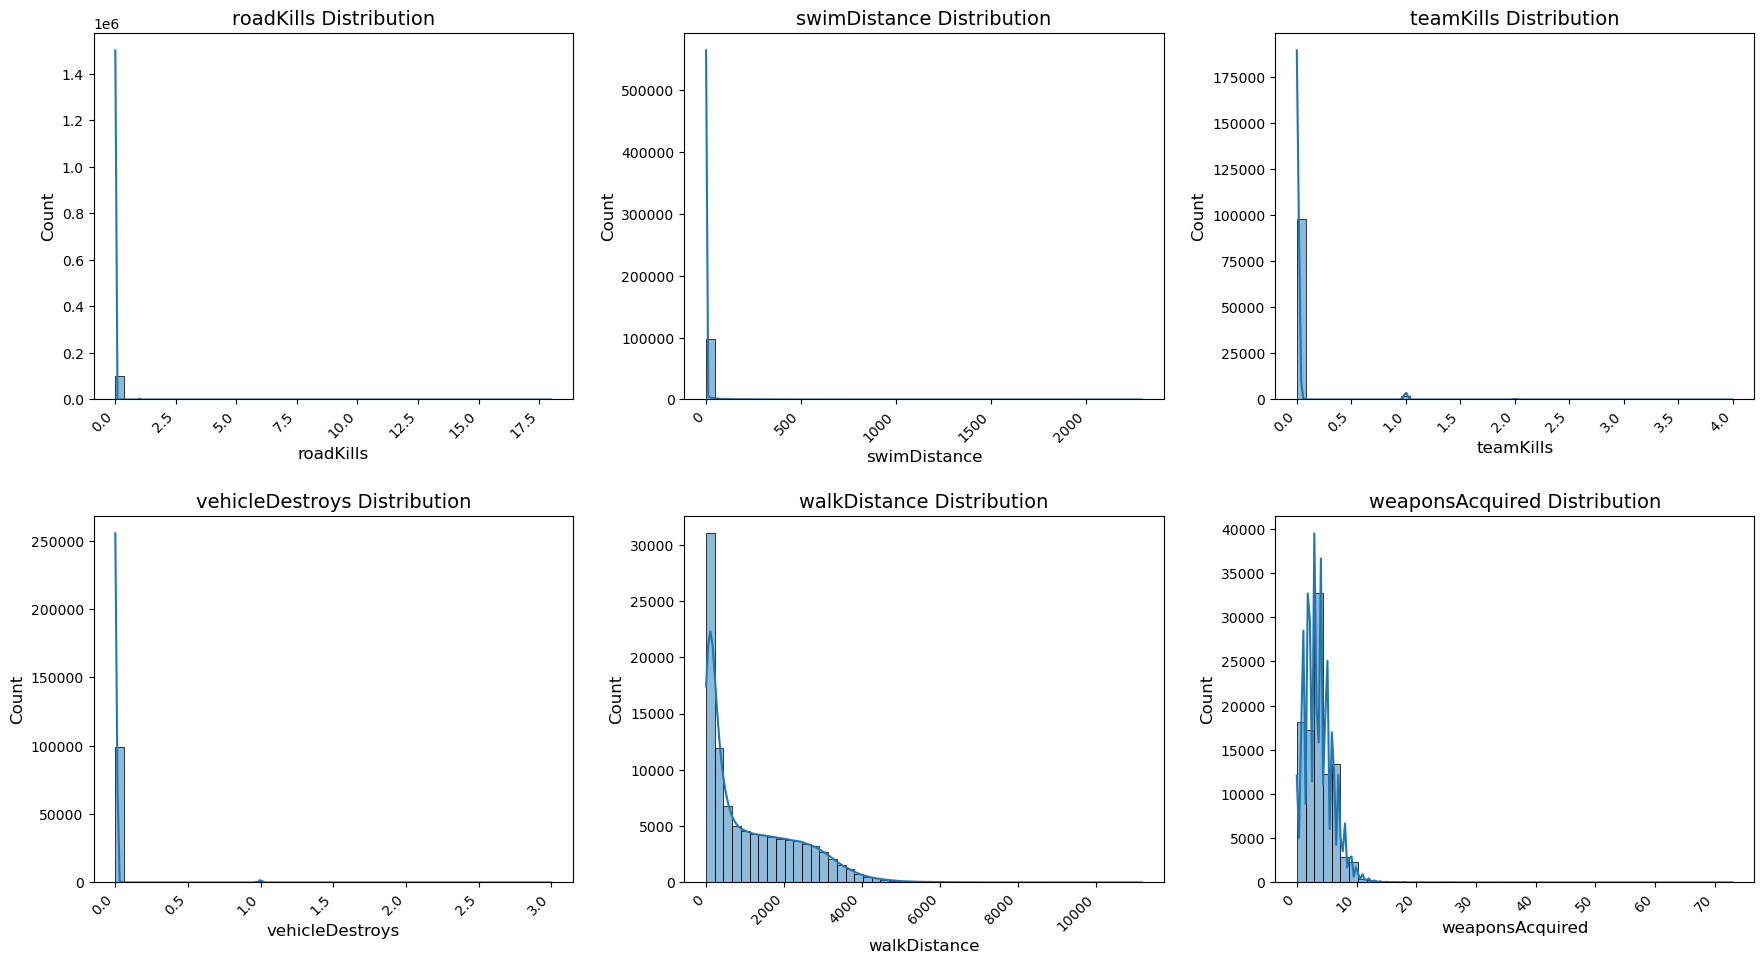

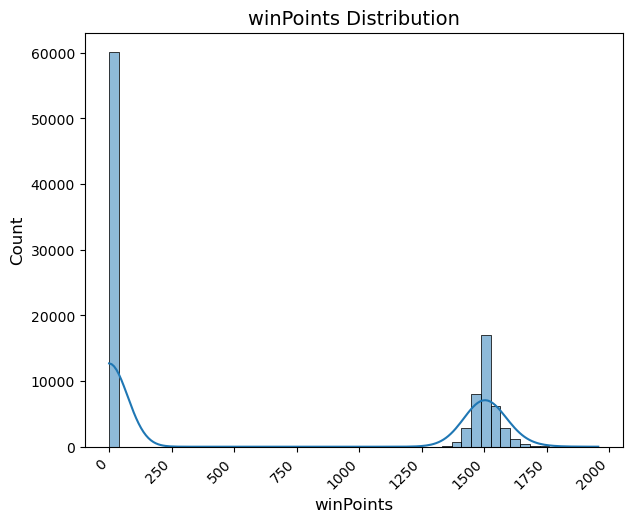

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import gc

# Sample the data for visualization
data_viz = data.sample(n=100000, random_state=42)

num_cols = ['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']

batch_size = 6  
for i in range(0, len(num_cols), batch_size):
    plt.figure(figsize=(18, 10), facecolor='white')
    for j, col in enumerate(num_cols[i:i+batch_size]):
        plt.subplot(2, 3, j + 1)  # 2 rows, 3 columns
        sns.histplot(data_viz[col], kde=True, bins=50)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'{col} Distribution', fontsize=14)
        plt.xticks(rotation=45, ha='right') 
    plt.tight_layout(pad=2.0)  
    plt.show()
    
    plt.clf()
    plt.close()
    gc.collect()


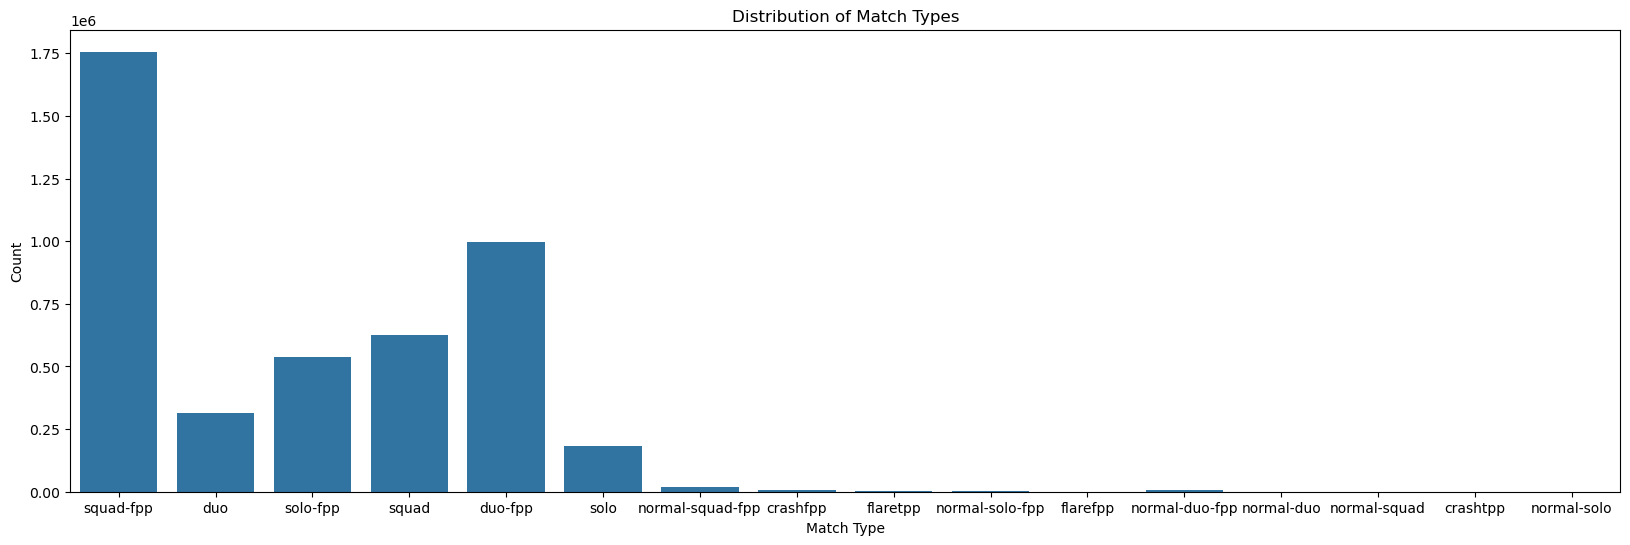

In [12]:
#for categorical column
plt.figure(figsize=(20, 6)) 
sns.countplot(data=data,x='matchType')
plt.title('Distribution of Match Types')
plt.xlabel('Match Type')
plt.ylabel('Count')
plt.show()

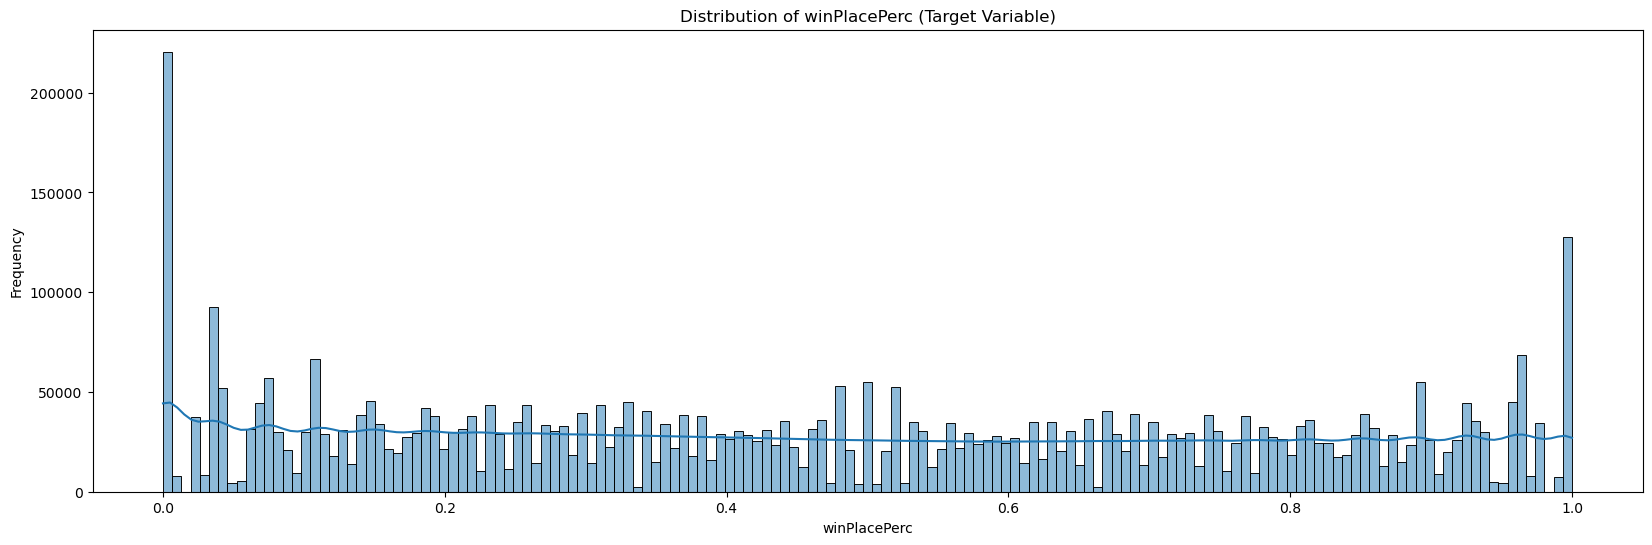

In [13]:
#for target column
plt.figure(figsize=(20, 6))
sns.histplot(data['winPlacePerc'],kde=True)
plt.title('Distribution of winPlacePerc (Target Variable)')
plt.xlabel('winPlacePerc')
plt.ylabel('Frequency')
plt.show()

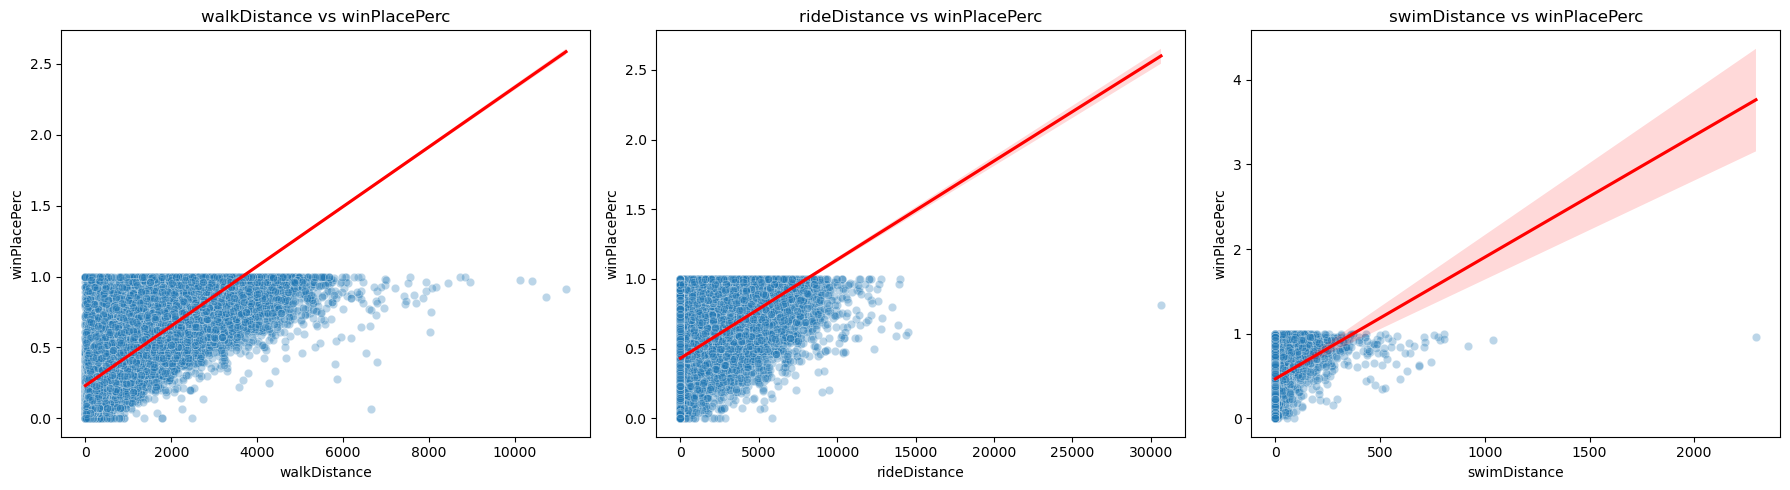

In [14]:
# Top Movement-Based Features vs Ranking
sample_data = data.sample(n=50000, random_state=42)

movement_feats = ['walkDistance', 'rideDistance', 'swimDistance']

plt.figure(figsize=(18, 5))
for i, col in enumerate(movement_feats, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=sample_data, x=col, y='winPlacePerc', alpha=0.3)
    sns.regplot(data=sample_data, x=col, y='winPlacePerc', scatter=False, color='red')
    plt.title(f'{col} vs winPlacePerc')
plt.tight_layout()
plt.show()


#### 5.2.Bivariate Analysis

##### Player Performance Features

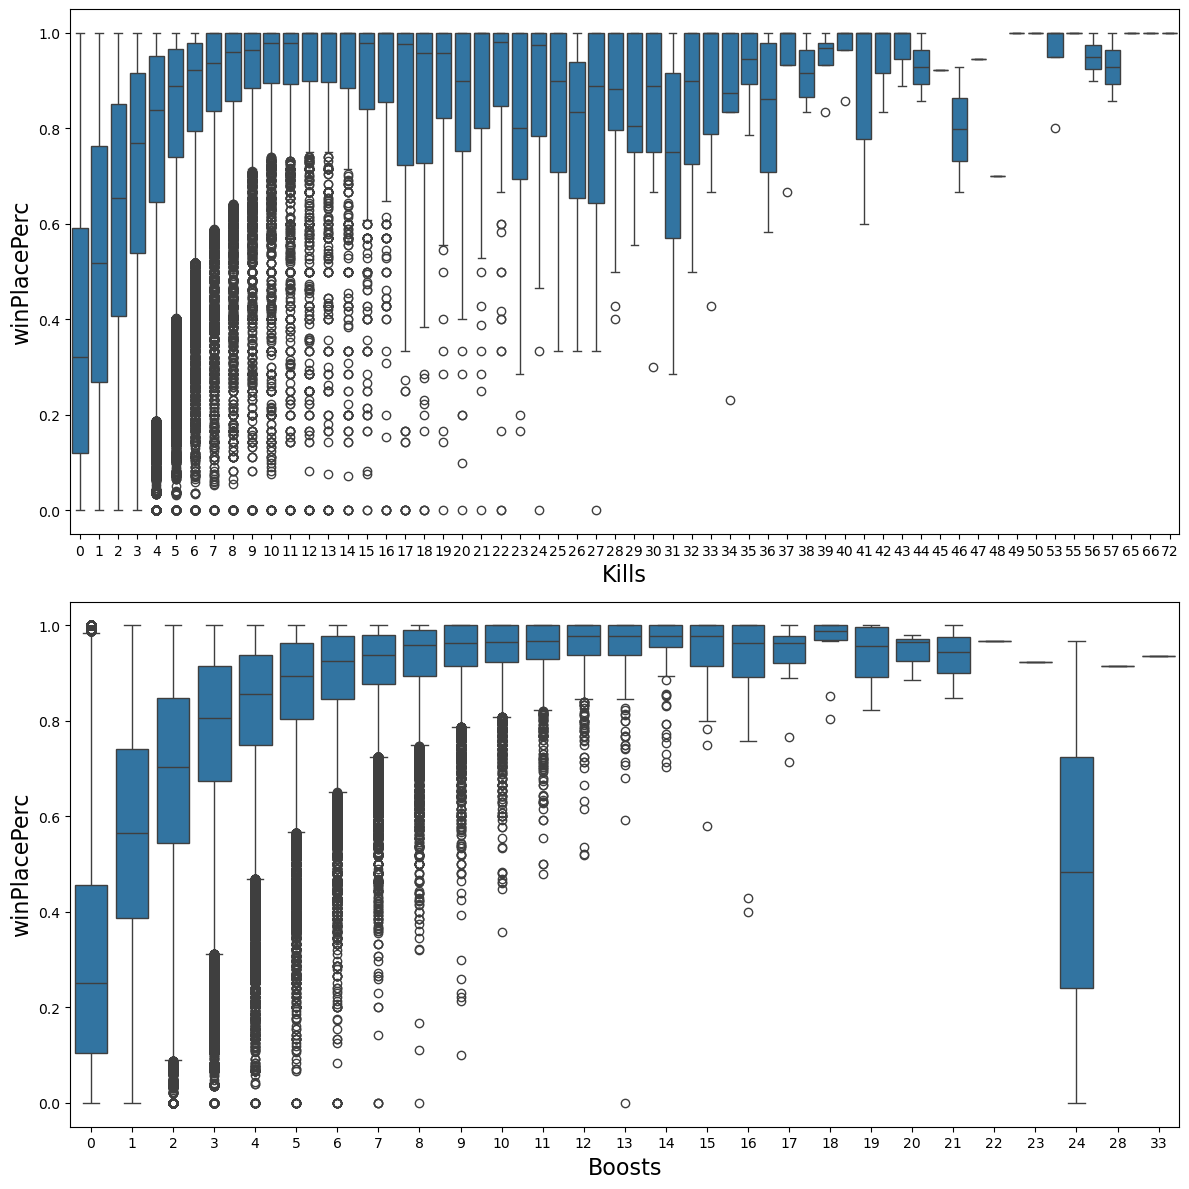

In [15]:
player_features = ['kills', 'boosts']

plt.figure(figsize=(12, 12), facecolor='white')
plotnumber = 1

for i in player_features:
    sp = plt.subplot(2, 1, plotnumber)  # 2 rows, 1 column
    sns.boxplot(data=data, x=i, y='winPlacePerc')
    plt.xlabel(i.title(), fontsize=16)
    plt.ylabel('winPlacePerc', fontsize=16)
    plotnumber += 1

plt.tight_layout()
plt.show()


##### Team Performance Features

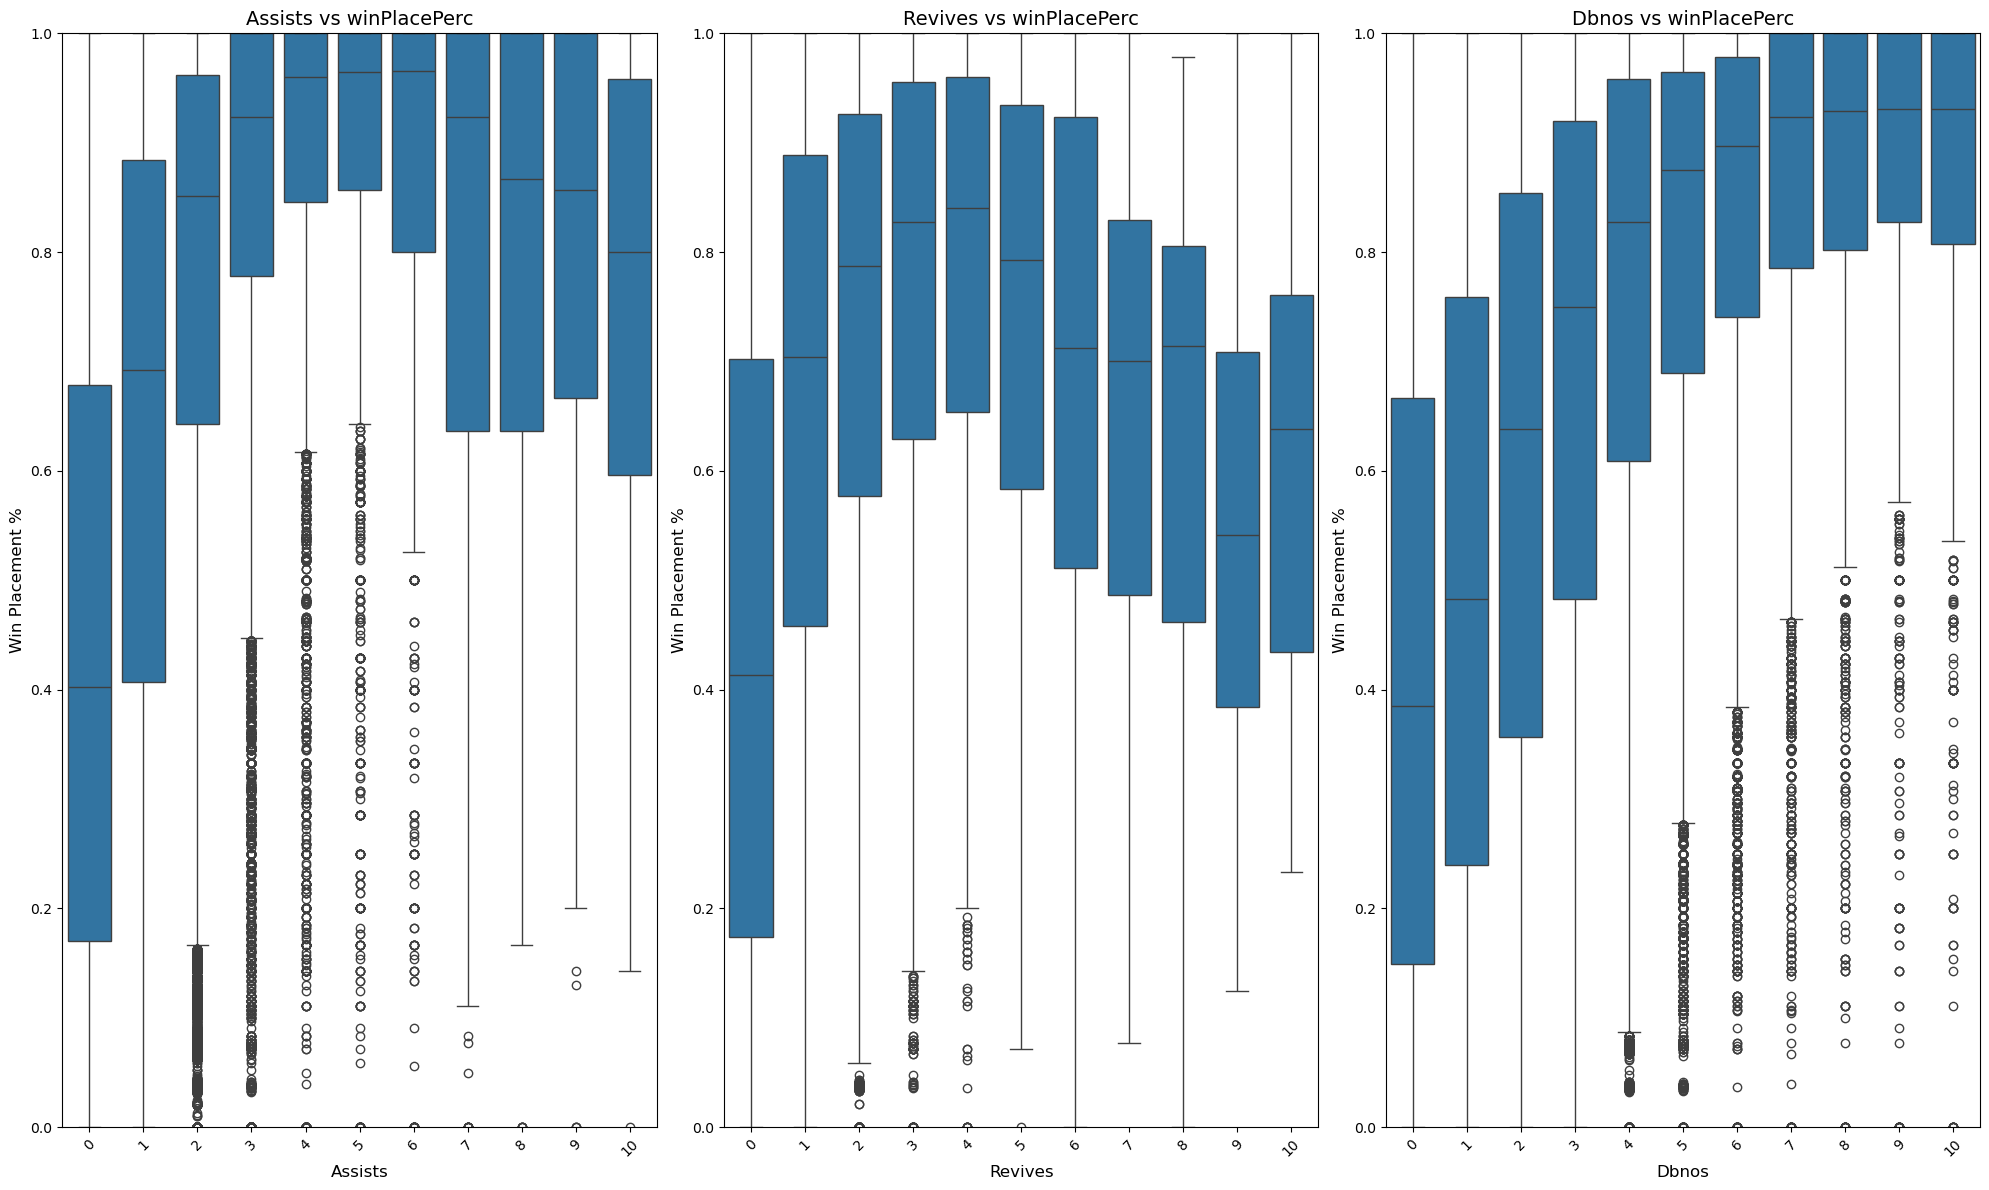

In [16]:
clip_limits = {
    'assists': 10,
    'revives': 10,
    'DBNOs': 10
}

team_features = ['assists', 'revives', 'DBNOs']
plt.figure(figsize=(20, 12), facecolor='white')

for idx, feature in enumerate(team_features, 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(
        data=data[data[feature] <= clip_limits[feature]], 
        x=feature, y='winPlacePerc'
    )
    plt.xlabel(feature.title(), fontsize=12)
    plt.ylabel('Win Placement %', fontsize=12)
    plt.title(f'{feature.title()} vs winPlacePerc', fontsize=14)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)  # Avoid overlap of x-axis labels

plt.tight_layout()
plt.show()


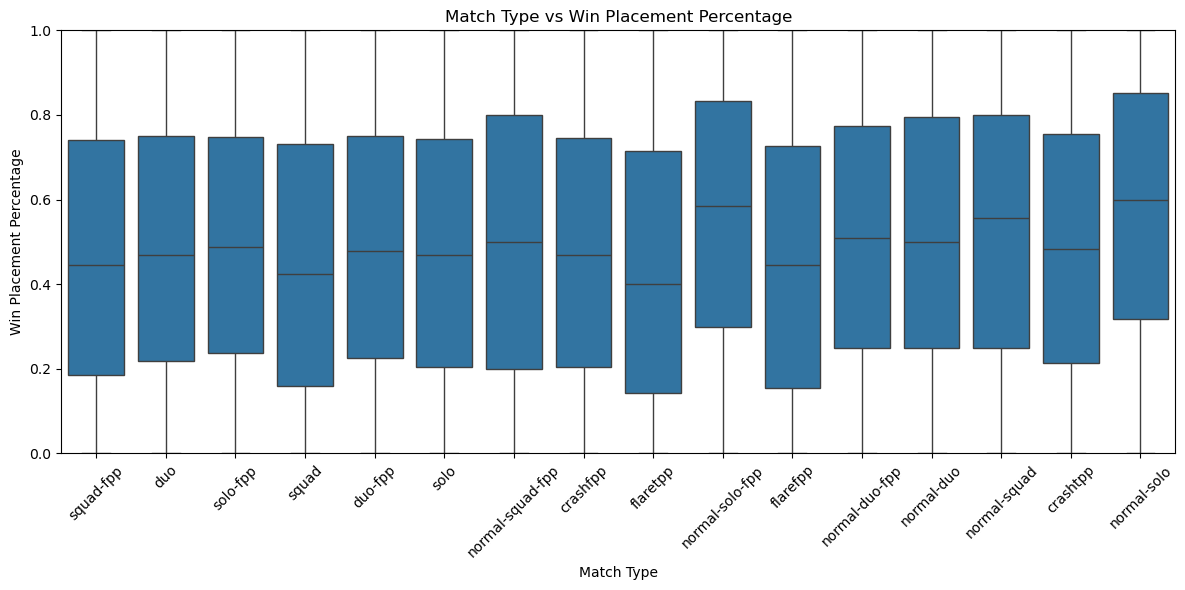

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='matchType', y='winPlacePerc', data=data)
plt.title('Match Type vs Win Placement Percentage')
plt.xlabel('Match Type')
plt.ylabel('Win Placement Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

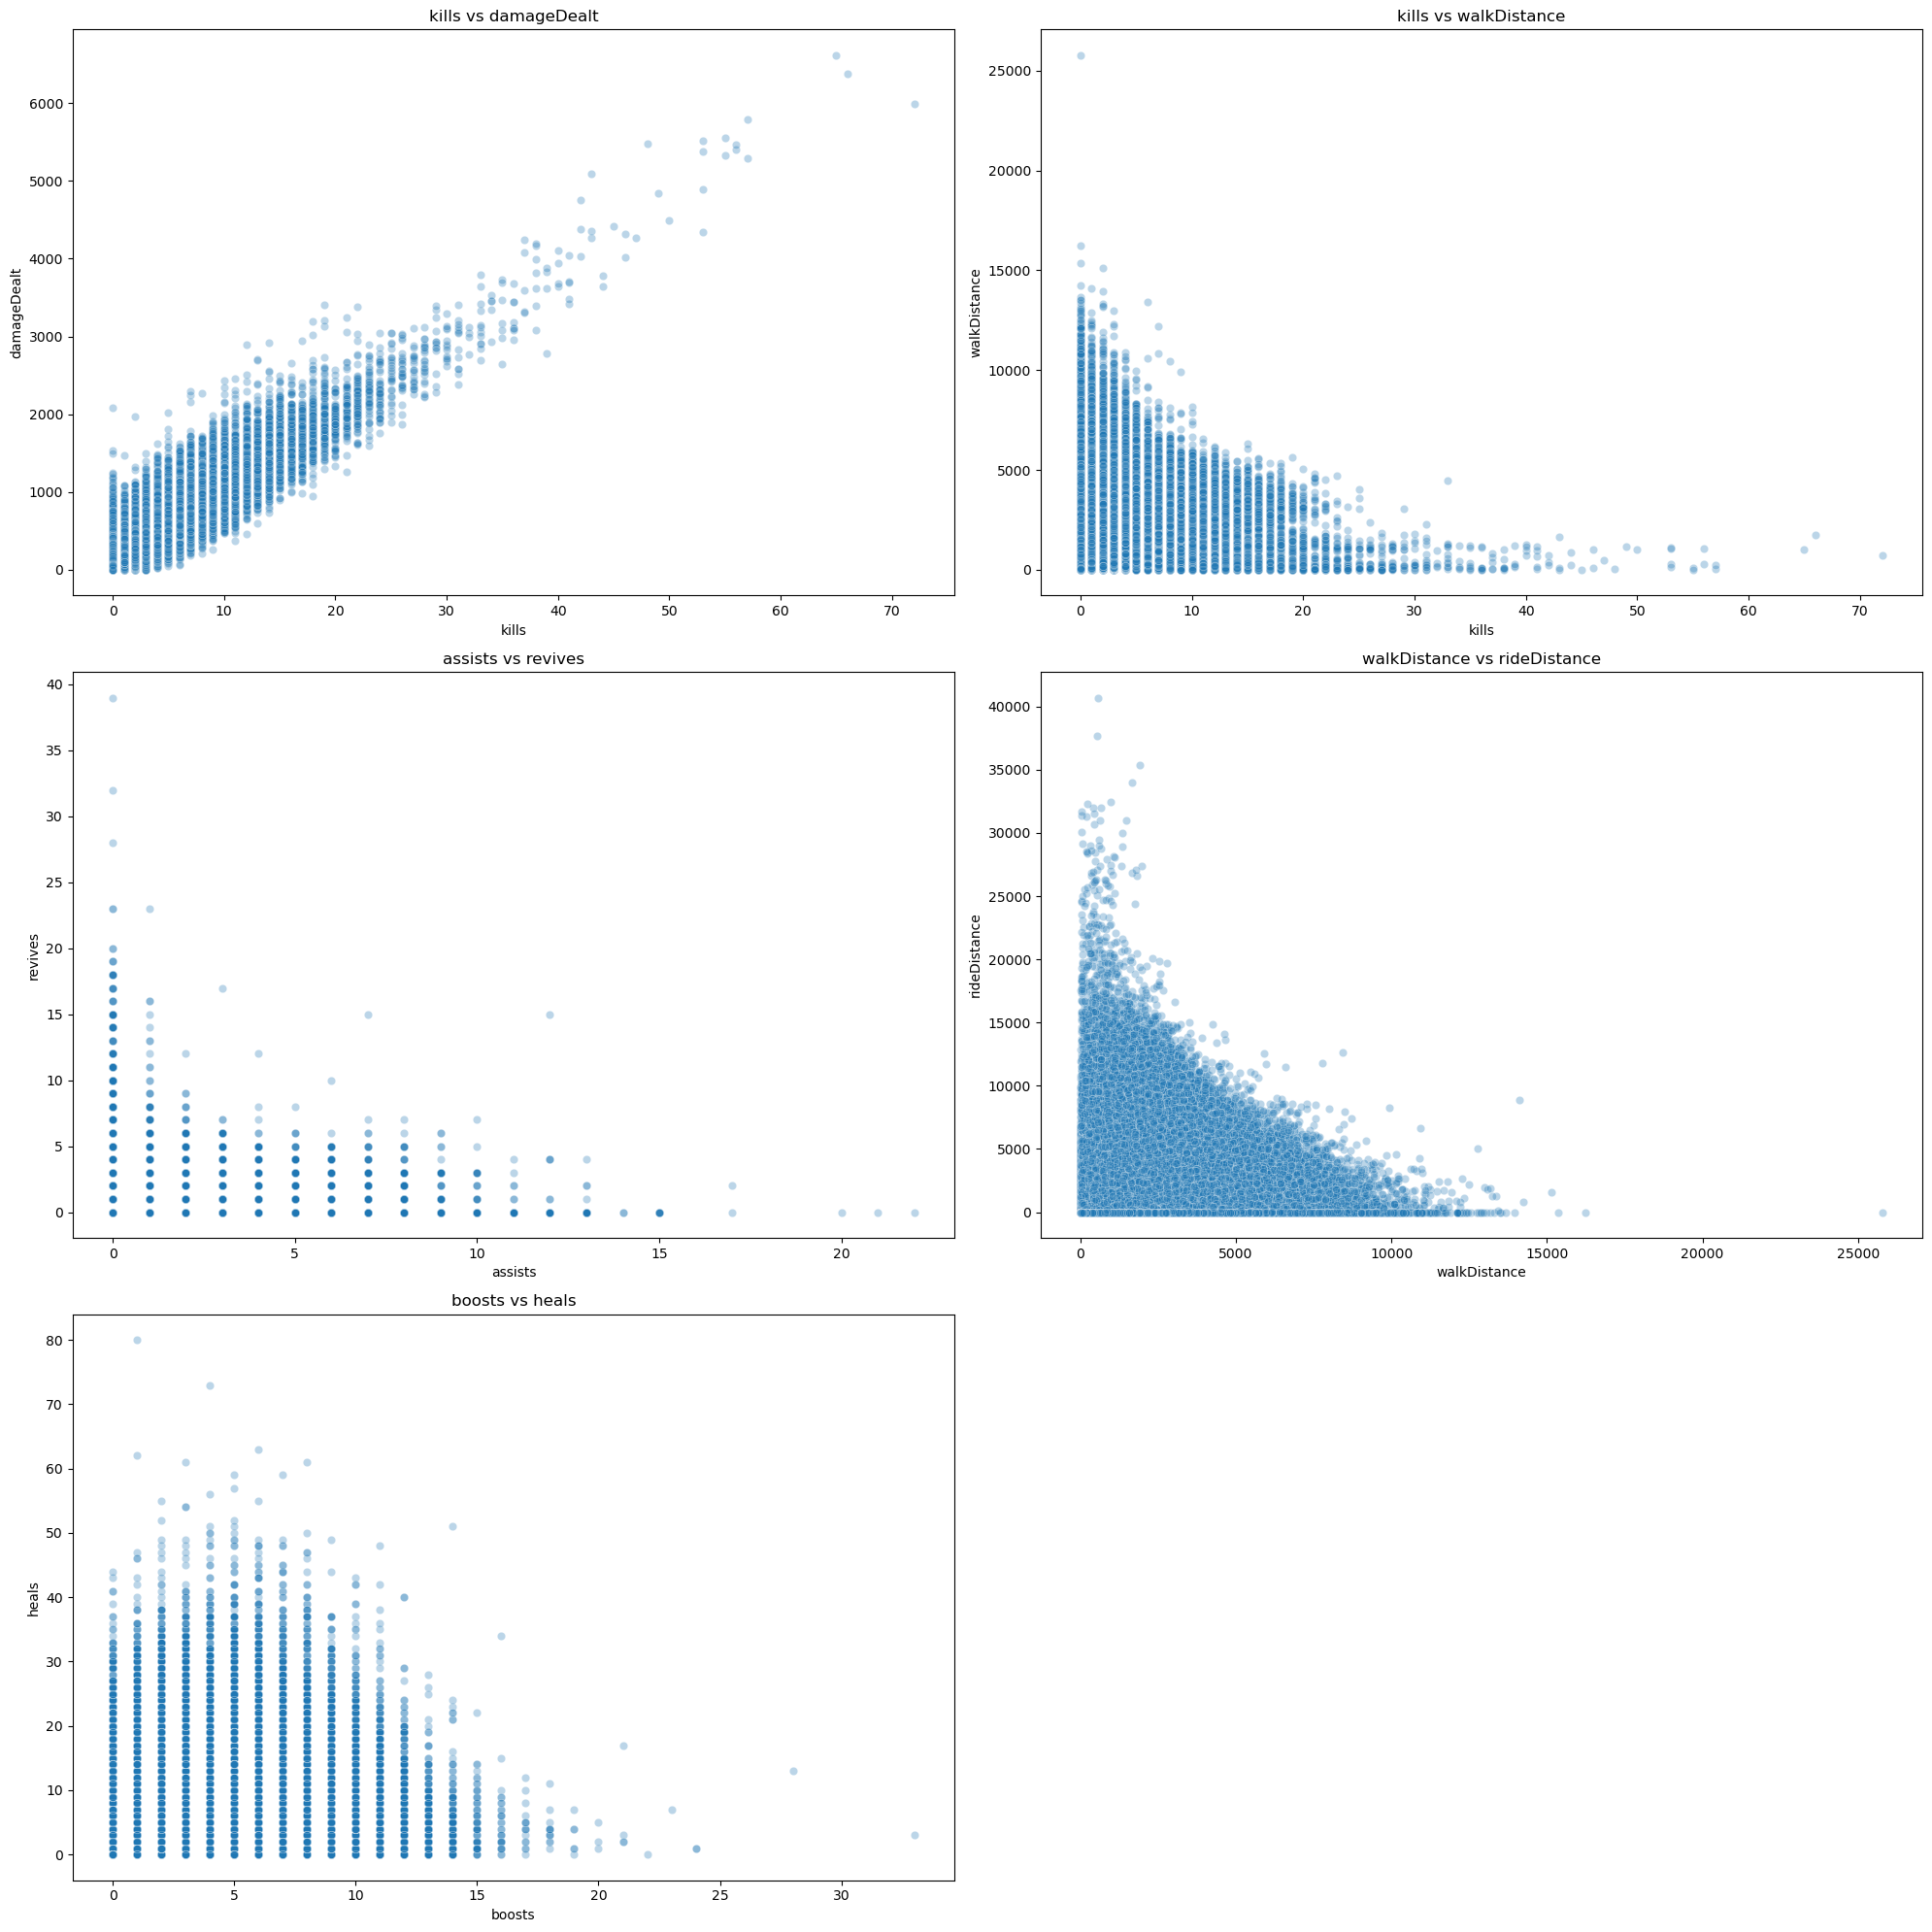

In [18]:
feature_pairs = [
    ('kills', 'damageDealt'),
    ('kills', 'walkDistance'),
    ('assists', 'revives'),
    ('walkDistance', 'rideDistance'),
    ('boosts', 'heals')
]

plt.figure(figsize=(20, 20))
for i, (x_feat, y_feat) in enumerate(feature_pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=data, x=x_feat, y=y_feat, alpha=0.3)
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f'{x_feat} vs {y_feat}')

plt.tight_layout()
plt.show()

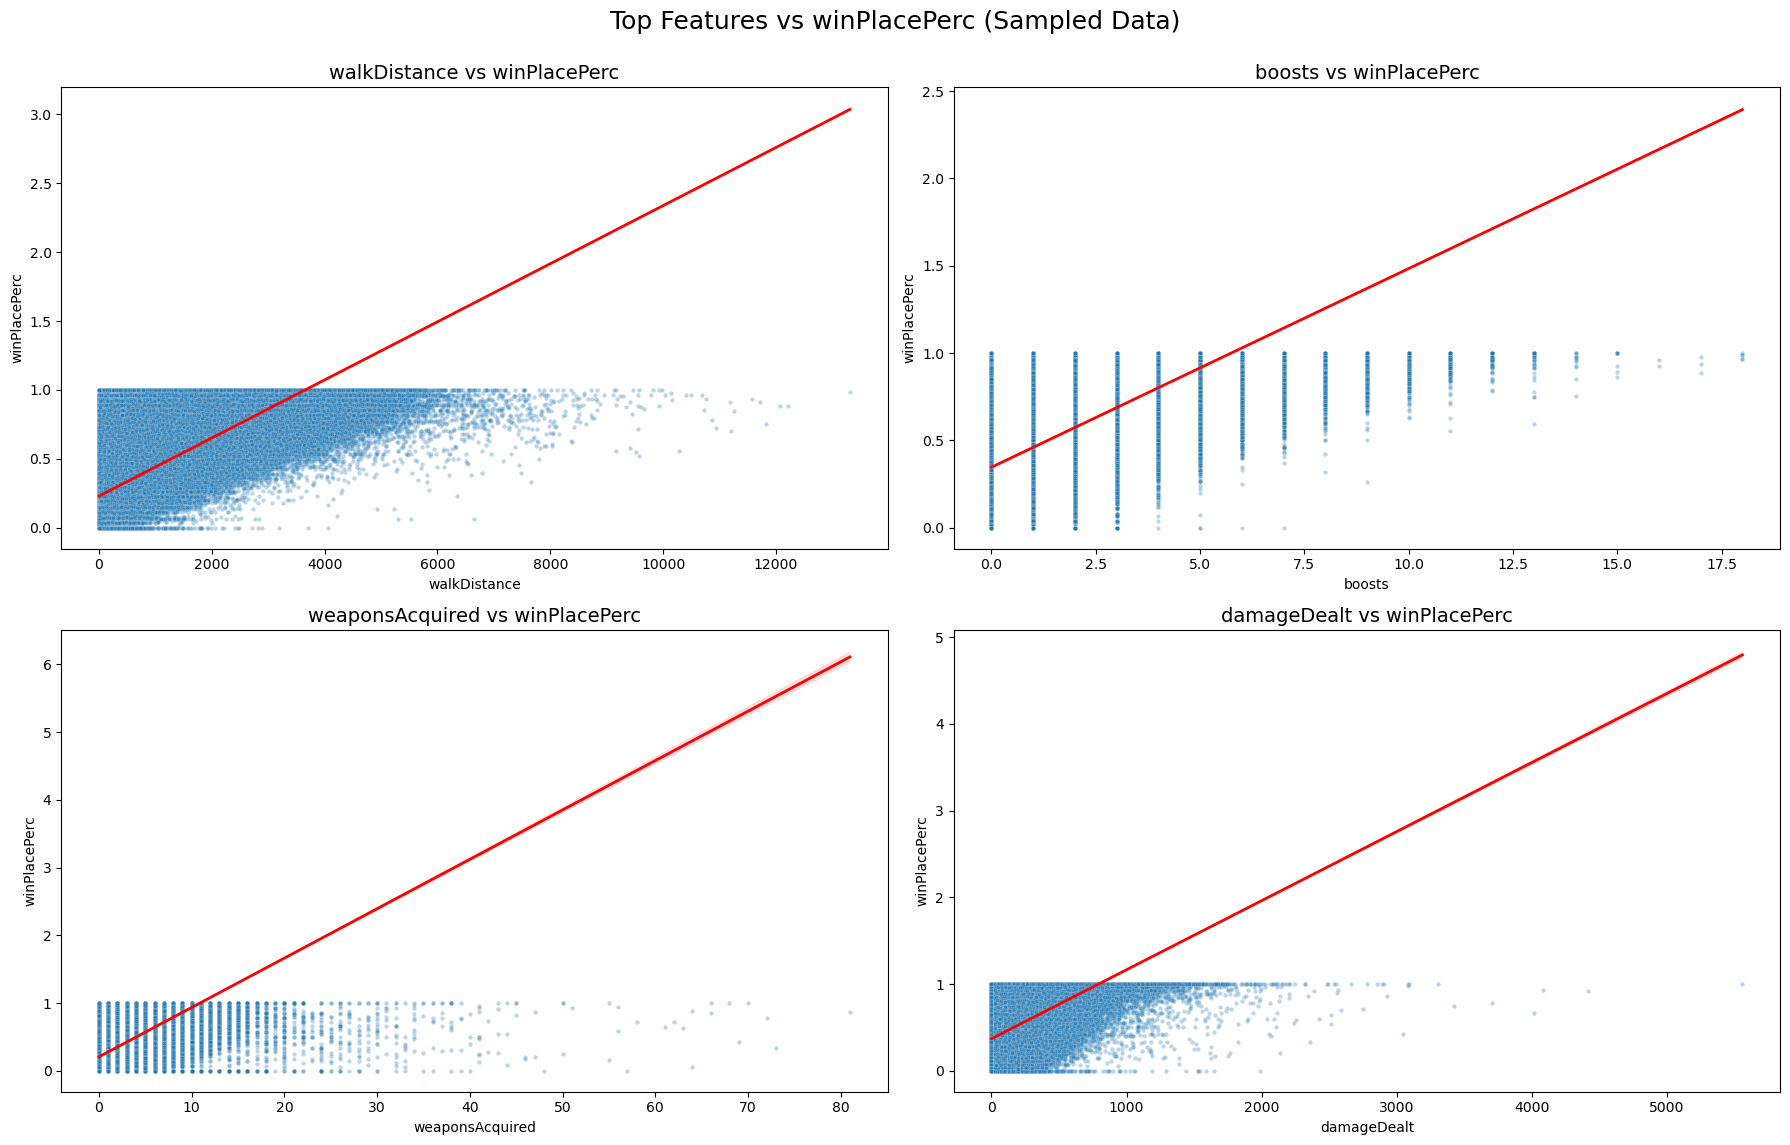

In [19]:
sample_data = data.sample(n=500000, random_state=42)

top_features = ['walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt']
target = 'winPlacePerc'

plt.figure(figsize=(18, 12))
plt.suptitle('Top Features vs winPlacePerc (Sampled Data)', fontsize=18, y=0.95)

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=sample_data, x=feature, y=target, alpha=0.3, s=10)
    sns.regplot(data=sample_data, x=feature, y=target, scatter=False, color='red', line_kws={"linewidth": 2})
    plt.title(f'{feature} vs {target}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Insights:** 
1. The `killPlace` feature follows a **uniform distribution**, indicating players are evenly spread across placement rankings.
2. The number of players with `killPoints = 0` is **significantly higher** compared to other values, suggesting many players do not register kills contributing to points.
3. The most common match type is **`squad-fpp`**, indicating a majority of games are played in first-person squad mode.
4. Approximately **200,000 players** have a **very low winning probability**, highlighting a skew toward less successful players.
5. The distance-based features — `walkDistance`, `rideDistance`, and `swimDistance` — show a **positive correlation** with the target variable (`winPlacePerc`), suggesting movement and engagement are linked with better performance.
6. Many features contain **extreme outliers**, which may need to be addressed during preprocessing to improve model performance and stability.

### 6.Data Preprocessing

#### 6.1.Dropping Missing Values and Irrelevant Columns

In [20]:
#dropping unrequired columns
to_drop_col=['Id', 'groupId', 'matchId']
for i in to_drop_col:
    data.drop(columns=i,inplace=True)

In [21]:
#cheking for missing vallues
data.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [22]:
data = data.dropna(subset=['winPlacePerc'])

In [23]:
data.duplicated().sum().sum()

1510

In [24]:
data[data.duplicated()]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
37825,0,0,0.0,0,0,0,19,0,0,0,0.0,1808,solo,19,2,1500,0,0.0,0,0.0,0,0,0.0,0,0,0.0
49461,0,0,0.0,0,0,0,17,0,0,0,0.0,1808,solo,17,2,1500,0,0.0,0,0.0,0,0,0.0,1,0,0.0
73543,0,0,0.0,0,0,0,17,0,0,0,0.0,1808,solo,19,2,1500,0,0.0,0,0.0,0,0,0.0,0,0,0.0
77963,0,0,0.0,0,0,0,18,0,0,0,0.0,1808,solo,18,2,1500,0,0.0,0,0.0,0,0,0.0,0,0,0.0
93839,0,0,0.0,0,0,0,17,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430451,0,0,0.0,0,0,0,2,0,0,0,0.0,1808,solo,18,2,1500,0,0.0,0,0.0,0,0,0.0,0,0,1.0
4433529,0,0,0.0,0,0,0,12,0,0,0,0.0,1808,solo,17,2,1500,0,0.0,0,0.0,0,0,0.0,1,0,0.0
4441644,0,0,0.0,0,0,0,15,0,0,0,0.0,1808,solo,19,2,1500,0,0.0,0,0.0,0,0,0.0,2,0,0.0
4441836,0,0,0.0,0,0,0,17,0,0,0,0.0,1808,solo,17,2,1500,0,0.0,0,0.0,0,0,0.0,0,0,0.0


In [25]:
data.drop_duplicates(inplace=True)

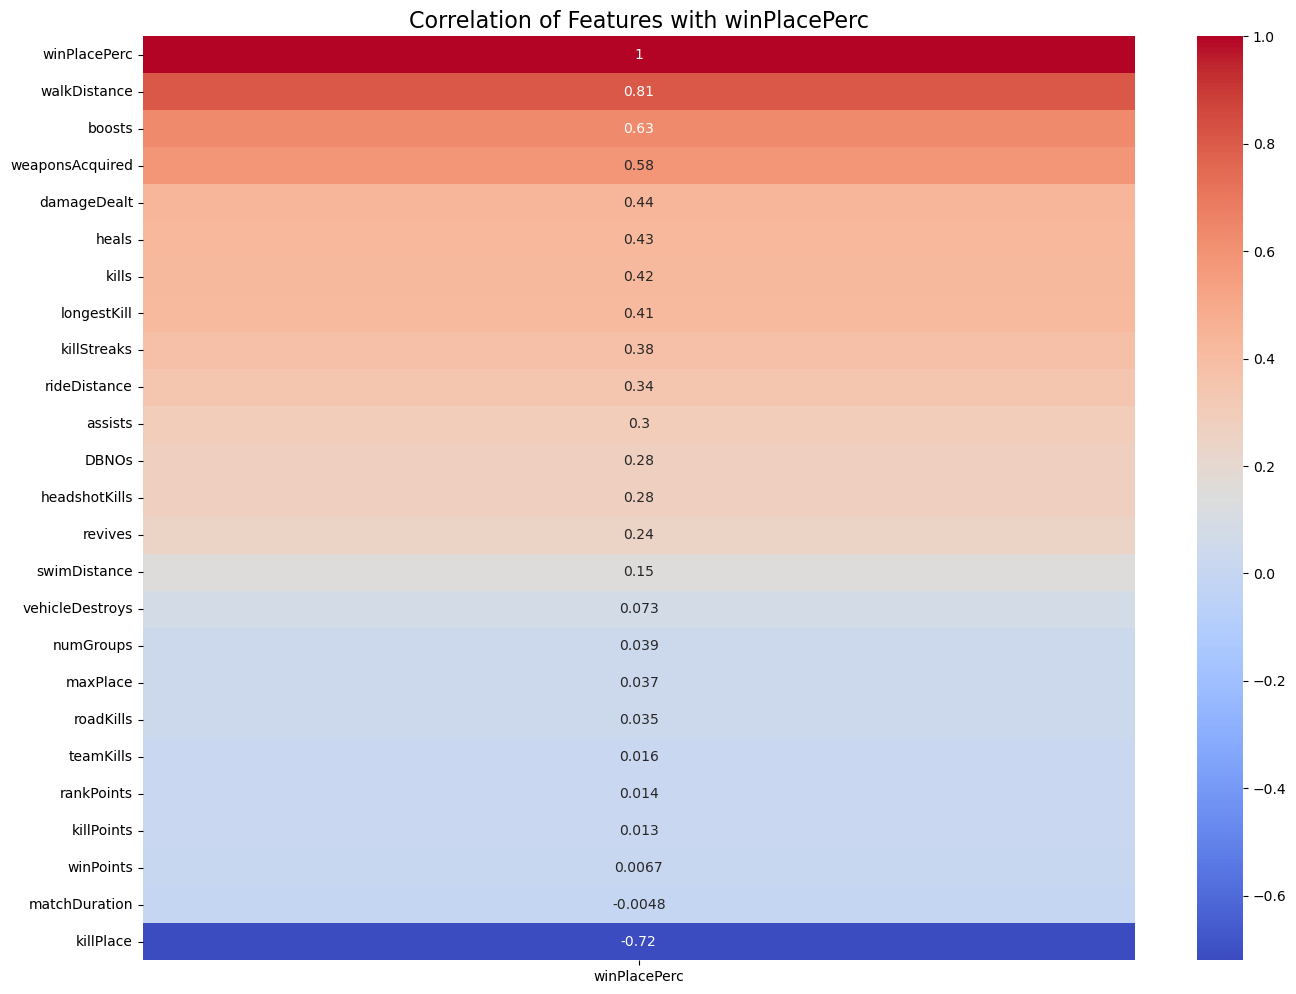

In [26]:
plt.figure(figsize=(16, 12))

correlation = data.drop(columns=['matchType']).corr()

sns.heatmap(correlation[['winPlacePerc']].sort_values(by='winPlacePerc', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation of Features with winPlacePerc", fontsize=16)
plt.show()


**Insight:** Features such as `walkDistance`, `boosts`, and `weaponsAcquired` are the **top 3 positive contributors** to the target column (`winPlacePerc`), while `killPlace` acts as a **negative contributor**.

#### 6.2.Encoding

In [27]:
le = LabelEncoder()
data['matchType'] = le.fit_transform(data['matchType'])

In [28]:
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,15,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,15,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,2,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,15,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,13,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,15,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,12,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,15,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,15,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [29]:
print(data.corr()['winPlacePerc'].sort_values(ascending=False))

winPlacePerc       1.000000
walkDistance       0.810892
boosts             0.634235
weaponsAcquired    0.583839
damageDealt        0.440401
heals              0.427811
kills              0.419834
longestKill        0.410124
killStreaks        0.377400
rideDistance       0.342874
assists            0.299385
DBNOs              0.279831
headshotKills      0.277666
revives            0.240820
swimDistance       0.149600
vehicleDestroys    0.073426
numGroups          0.038863
maxPlace           0.036889
roadKills          0.034536
teamKills          0.015882
rankPoints         0.013914
killPoints         0.012539
winPoints          0.006682
matchDuration     -0.004775
matchType         -0.028429
killPlace         -0.720124
Name: winPlacePerc, dtype: float64


#### 6.3.Outliers Analysis

In [30]:
outlier_summary = {}

for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
    else:
        print(f"Skipping non-numeric column: {col}")

for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


assists: 779306 outliers
boosts: 142191 outliers
damageDealt: 215546 outliers
DBNOs: 294831 outliers
headshotKills: 750850 outliers
heals: 326055 outliers
killPlace: 0 outliers
killPoints: 0 outliers
kills: 516699 outliers
killStreaks: 52340 outliers
longestKill: 614233 outliers
matchDuration: 2625 outliers
matchType: 0 outliers
maxPlace: 701849 outliers
numGroups: 698788 outliers
rankPoints: 62 outliers
revives: 587099 outliers
rideDistance: 1109916 outliers
roadKills: 12996 outliers
swimDistance: 289272 outliers
teamKills: 96930 outliers
vehicleDestroys: 33754 outliers
walkDistance: 26906 outliers
weaponsAcquired: 78397 outliers
winPoints: 0 outliers
winPlacePerc: 0 outliers


In [31]:
outlier_cols = [
    'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
    'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
    'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
    'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
    'weaponsAcquired'
]

def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

    return data

data = handle_outliers_iqr(data, outlier_cols)

In [32]:
outlier_check = {}

for col in outlier_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_check[col] = len(outliers)

for col, count in outlier_check.items():
    print(f"{col}: {count} outliers remaining")


assists: 0 outliers remaining
boosts: 0 outliers remaining
damageDealt: 0 outliers remaining
DBNOs: 0 outliers remaining
headshotKills: 0 outliers remaining
heals: 0 outliers remaining
kills: 0 outliers remaining
killStreaks: 0 outliers remaining
longestKill: 0 outliers remaining
matchDuration: 0 outliers remaining
maxPlace: 0 outliers remaining
numGroups: 0 outliers remaining
rankPoints: 0 outliers remaining
revives: 0 outliers remaining
rideDistance: 0 outliers remaining
roadKills: 0 outliers remaining
swimDistance: 0 outliers remaining
teamKills: 0 outliers remaining
vehicleDestroys: 0 outliers remaining
walkDistance: 0 outliers remaining
weaponsAcquired: 0 outliers remaining


#### 6.4.Skewness Check

In [3]:
num_cols = ['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']

In [4]:
from pandas.api.types import is_numeric_dtype

numeric_cols = [col for col in num_cols if is_numeric_dtype(data[col])]

skewed = data[numeric_cols].skew().sort_values(ascending=False)
print(skewed)


roadKills          36.934921
swimDistance       14.723097
vehicleDestroys    12.723040
teamKills           8.194191
headshotKills       5.218261
revives             4.290687
longestKill         3.944918
assists             3.567609
heals               3.444345
kills               3.362907
rideDistance        3.346419
DBNOs               3.201537
damageDealt         2.958920
weaponsAcquired     2.572307
boosts              1.949959
numGroups           1.361652
maxPlace            1.354722
killStreaks         1.252573
walkDistance        1.092797
killPoints          0.519117
winPoints           0.405358
matchDuration       0.276002
killPlace           0.026424
rankPoints         -0.366956
dtype: float64


In [35]:
S = {
    "roadKills": [36.934917],
    "swimDistance": [14.723095],
    "vehicleDestroys": [12.723039],
    "teamKills": [8.194190],
    "headshotKills": [5.218260],
    "revives": [4.290687],
    "longestKill": [3.944918],
    "assists": [3.567608],
    "heals": [3.444345],
    "kills": [3.362907],
    "rideDistance": [3.346418],
    "DBNOs": [3.201536],
    "damageDealt": [2.958920],
    "weaponsAcquired": [2.572308],
    "boosts": [1.949958],
    "numGroups": [1.361654],
    "maxPlace": [1.354723],
    "killStreaks": [1.252573],
    "walkDistance": [1.092797],
    "killPoints": [0.519117],
    "winPoints": [0.405358],
    "matchDuration": [0.276051],
    "killPlace": [0.026424],
    "rankPoints": [-0.366956]
}

df1 = pd.DataFrame(S)

log_transform_cols = [
    "roadKills", "swimDistance", "vehicleDestroys", "teamKills", "headshotKills",
    "revives", "longestKill", "assists", "heals", "kills", "rideDistance",
    "DBNOs", "damageDealt", "weaponsAcquired", "boosts", "numGroups",
    "maxPlace", "killStreaks", "walkDistance"
]

sqrt_transform_cols = ["killPoints", "winPoints", "matchDuration"]

df1[log_transform_cols] = np.log1p(df1[log_transform_cols])
df1[sqrt_transform_cols] = np.sqrt(df1[sqrt_transform_cols])

df1.T

,0
roadKills,3.635872
swimDistance,2.755131
vehicleDestroys,2.619076
teamKills,2.218572
headshotKills,1.827490
revives,1.665948
longestKill,1.598360
assists,1.518990
heals,1.491633
kills,1.473139


#### 6.5. Scaling 

In [36]:
num_cols = ['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']

df_scaled = data.copy()

scaler = StandardScaler()

df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.0,-0.691733,-0.906193,-0.688790,0.0,-0.645643,0.451181,1.172547,-0.770579,-0.784287,-0.658466,-1.058058,0.782904,-0.749560,-0.805087,-1.212005,0.0,-0.577789,0.0,0.0,0.0,0.0,-0.777645,-1.169985,1.161669,0.4444
1,0.0,-0.691733,-0.220538,-0.688790,0.0,-0.645643,0.341929,-0.805009,-0.770579,-0.784287,-0.658466,0.764070,0.782904,-0.855373,-0.860465,0.803950,0.0,-0.561675,0.0,0.0,0.0,0.0,0.244513,0.618508,-0.820105,0.6400
2,0.0,-0.691733,-0.396468,-0.688790,0.0,-0.645643,-0.022244,-0.805009,-0.770579,-0.784287,-0.658466,-1.011635,-1.657478,0.414374,0.357851,0.813453,0.0,-0.577789,0.0,0.0,0.0,0.0,-0.848987,-0.722862,-0.820105,0.7755
3,0.0,-0.691733,-0.659576,-0.688790,0.0,-0.645643,0.997440,-0.805009,-0.770579,-0.784287,-0.658466,-0.555135,0.782904,-0.590842,-0.583575,0.700777,0.0,-0.577789,0.0,0.0,0.0,0.0,-0.813832,-0.275738,-0.820105,0.1667
4,0.0,-0.691733,-0.156597,-0.688790,0.0,-0.645643,-0.095079,-0.805009,0.311833,0.677502,2.041362,-0.601559,0.407461,2.028010,2.019190,0.907124,0.0,-0.577789,0.0,0.0,0.0,0.0,-0.945298,-0.722862,-0.820105,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0.0,-0.691733,-0.906193,-0.688790,0.0,-0.645643,0.961023,0.834721,-0.770579,-0.784287,-0.658466,1.135460,0.782904,-0.696654,-0.694331,-1.212005,0.0,1.732747,0.0,0.0,0.0,0.0,-0.112194,-0.275738,1.217093,0.1786
4446962,0.0,-0.029824,-0.575247,-0.688790,0.0,-0.645643,0.778936,-0.805009,-0.770579,-0.784287,-0.658466,-0.559004,0.219739,2.028010,2.019190,0.827028,0.0,-0.577789,0.0,0.0,0.0,0.0,-0.917836,1.065631,-0.820105,0.2935
4446963,0.0,-0.691733,-0.463482,-0.688790,0.0,-0.645643,0.669684,-0.805009,-0.770579,-0.784287,-0.658466,-1.000029,0.782904,-0.749560,-0.694331,0.825671,0.0,-0.577789,0.0,0.0,0.0,0.0,-0.310145,0.171385,-0.820105,0.4815
4446964,0.0,1.955902,0.446078,0.530834,0.0,0.551263,-1.333266,-0.805009,1.394246,0.677502,2.041362,-0.798860,0.782904,-0.855373,-0.860465,0.714352,0.0,-0.577789,0.0,0.0,0.0,0.0,1.373941,1.959877,-0.820105,0.8000


### 7. Data Splitting

In [38]:
X = df_scaled.drop('winPlacePerc', axis=1) 
Y = df_scaled['winPlacePerc']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 8. Model Building

#### 8.1. Linear Regression

In [41]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)

lr_rmse = mean_squared_error(Y_test, lr_pred, squared=False)
lr_r2 = r2_score(Y_test, lr_pred)

print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Linear Regression R² Score: {lr_r2:.4f}")


Linear Regression RMSE: 0.1177
Linear Regression R² Score: 0.8532


#### 8.2. XGBoost

In [42]:
x = data.drop('winPlacePerc', axis=1) 
y = data['winPlacePerc']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
xgb_model = XGBRegressor(tree_method='gpu_hist') 
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)


xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"RMSE: {xgb_rmse:.4f}")
print(f"R² Score: {xgb_r2:.4f}")


RMSE: 0.0827
R² Score: 0.9276


#### 8.2.1.Hyperparameter Tuning 

In [46]:
X_train_sample = x_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]


xgb = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',         
    enable_categorical=False,  
    random_state=42
)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,                      
    scoring='neg_root_mean_squared_error',
    cv=2,                          
    verbose=2,
    n_jobs=-1
)

xgb_random_search.fit(X_train_sample, y_train_sample)

xgb_best_model = xgb_random_search.best_estimator_
xgb_y_pred = xgb_best_model.predict(x_test)
xgb_best_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_best_r2 = r2_score(y_test,xgb_y_pred)

print("Best RMSE (CV):", -xgb_random_search.best_score_)
print("Best Params:", xgb_random_search.best_params_)
print("R2_score for XGB_ht:", xgb_best_r2)
print("Test RMSE:", xgb_best_rmse)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best RMSE (CV): 0.08157863161279218
Best Params: {'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
R2_score for XGB_ht: 0.9311169376945834
Test RMSE: 0.0806302938644684


#### 8.3. LightGBM

In [47]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(x_train, y_train)

lgbm_pred = lgbm_model.predict(x_test)

lgbm_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
lgbm_r2 = r2_score(y_test, lgbm_pred)

print(f"RMSE: {lgbm_rmse:.4f}")
print(f"R² Score: {lgbm_r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.151832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2347
[LightGBM] [Info] Number of data points in the train set: 3556364, number of used features: 18
[LightGBM] [Info] Start training from score 0.473009
RMSE: 0.0846
R² Score: 0.9241


#### 8.3.1.Hyperparameter Tuning

In [48]:
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 10, 20, 30],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5],
}

lgbm_best= LGBMRegressor(objective='regression', random_state=42, n_jobs=-1)

lgbm_random_search = RandomizedSearchCV(
    estimator=lgbm_best,
    param_distributions=param_grid,
    n_iter=30,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

lgbm_random_search.fit(x_train, y_train)

print("Best Parameters:", lgbm_random_search.best_params_)

best_lgbm = lgbm_random_search.best_estimator_
lgbm_y_pred = best_lgbm.predict(x_test)

lgbm_best_rmse = mean_squared_error(y_test, lgbm_y_pred, squared=False)
lgbm_best_r2 = r2_score(y_test, lgbm_y_pred)

print(f"Tuned LightGBM RMSE: {lgbm_best_rmse:.4f}")
print(f"Tuned LightGBM R² Score: {lgbm_best_r2:.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.135576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2348
[LightGBM] [Info] Number of data points in the train set: 3556364, number of used features: 18
[LightGBM] [Info] Start training from score 0.473009
Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 100, 'n_estimators': 1000, 'min_child_samples': 30, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Tuned LightGBM RMSE: 0.0801
Tuned LightGBM R² Score: 0.9321


#### 8.4.Random Forest

In [49]:
rf = RandomForestRegressor(
    n_estimators=50,        
    max_depth=15,
    max_features='sqrt',    
    n_jobs=-1,               
    random_state=42,
    verbose=0              
)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=50,
                      n_jobs=-1, random_state=42)

In [50]:
rf_pred = rf.predict(x_test)

rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print(f"RMSE: {rf_rmse:.4f}")
print(f"R² Score: {rf_r2:.4f}")


RMSE: 0.0905
R² Score: 0.9132


#### 8.4.1.Hyperparameter Tuning

In [51]:
X_small, _, y_small, _ = train_test_split(x, y, train_size=0.3, random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_ht= RandomForestRegressor(random_state=42, n_jobs=-1)

random_search_ht = RandomizedSearchCV(
    estimator=rf_ht,
    param_distributions=param_dist,
    n_iter=10, 
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_ht.fit(X_small, y_small)

best_rf = random_search_ht.best_estimator_
rf_ht_pred = best_rf.predict(x_test)

rf_ht_rmse = mean_squared_error(y_test, rf_ht_pred, squared=False)
rf_ht_r2 = r2_score(y_test, rf_ht_pred)

print("Best Hyperparameters:", random_search_ht.best_params_)
print(f"RMSE: {rf_ht_rmse:.4f}")
print(f"R² Score: {rf_ht_r2:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
RMSE: 0.0837
R² Score: 0.9257


### 9.Model Comparison

In [52]:
comparison_dict = {'Model':['LinearRegression','RandomForestRegressor','XGBoostRegressor','LightGBMRegressor'],
                   'R2-Score':[lr_r2,rf_ht_r2,xgb_best_r2,lgbm_best_r2]
                  }

comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df)

                   Model  R2-Score
0       LinearRegression  0.853176
1  RandomForestRegressor  0.925736
2       XGBoostRegressor  0.931117
3      LightGBMRegressor  0.932079


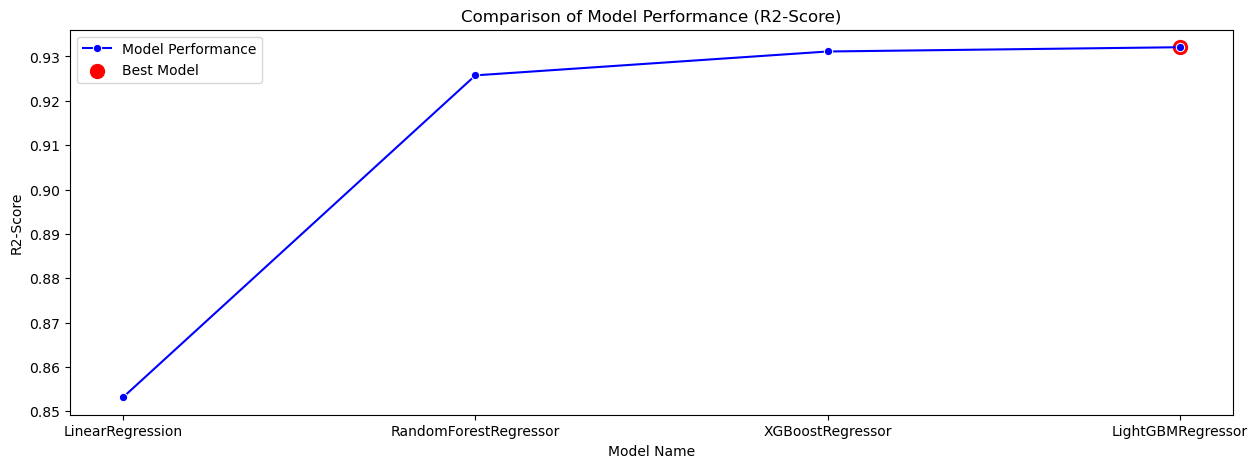

In [54]:
comparison_df = comparison_df.sort_values(by='R2-Score', ascending=True)

max_index = comparison_df['R2-Score'].idxmax() 

plt.figure(figsize=(15, 5))
sns.lineplot(data=comparison_df, x='Model', y='R2-Score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'R2-Score'],color='red', s=100, label="Best Model")

plt.xlabel("Model Name")
plt.ylabel("R2-Score")

plt.legend()
plt.title("Comparison of Model Performance (R2-Score)")
plt.show()

### 10.Conclusion

We trained multiple algorithms, including Linear Regression, XGBoost, LightGBM, and Random Forest. Given the large dataset of 4.4 million records, all four algorithms handled the data efficiently due to their GPU support and optimized computational performance. To manage training time without compromising pattern recognition, we used representative samples from the dataset. Among the models tested, **LightGBM** demonstrated the best overall performance in both training and prediction.

### Reports On Challenges Faced

1. Handling large datasets posed a significant challenge, requiring careful consideration of memory management and processing efficiency.
2. The computational time was considerably high, especially during model training and hyperparameter tuning, emphasizing the need for optimized algorithms and hard.

#### Project Details:
##### Project Team ID:
##### PTID-CDS-JAN-25-2365
##### Project ID:
##### PRCP-1012-GameWinnerPred
##### Team Members:
1. Akshaya S.K - akshayasnowbha@gmail.com
2. Rajeshwari A - rajeshwariarumugam03@gmail.com
3. Unnamalai Saranya R - saranyaramesh0602@gmail.com
4. Vyshnavi - vyshnavi2752@gmail.com